In [1]:
#import datas.mnist_data as mnist_local
from data import input_data
mnist = input_data.read_data_sets("./data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# ignore future waring
from __future__ import division, print_function, absolute_import

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib.gridspec as gridspec
import os

In [3]:
# 트레이닝 파라메터
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000

In [4]:
# 네트워크 파라메터
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

In [5]:
# 생성된 MNIST 이미지를 8x8 Grid로 보여주는 plot 함수를 정의합니다.
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        plt.imshow(sample.reshape(28, 28))
    return fig

In [6]:
# 생성된 이미지들을 저장할 generated_outputs 폴더를 생성합니다.
num_img = 0
if not os.path.exists('generated_output/'):
    os.makedirs('generated_output/')

In [7]:
# X(이미지)의 입력값(No labels, only pictures)
X = tf.placeholder(np.float32, [None, num_input]) # 무한대 x 784 행렬
z = tf.placeholder(tf.float32, [None, num_hidden_2])     # 인풋 Latent Variable

In [8]:
# 모델의 wright와 bias의 배열값
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [9]:
# 인코더 설정
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2

In [10]:
# 디코더 설정
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

In [11]:
# 모델 생성
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [12]:
# 예측값(디코더에서의 출력값)
y_pred = decoder_op

# 원래값(인코더로의 입력값)
y_true = X

In [13]:
# Loss Function 및 optimizer 설정
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

In [14]:
# 전체 변수 초기화 선언
init = tf.global_variables_initializer()

In [15]:

# TF session 시작
sess = tf.Session()

# initializer 실행
sess.run(init)

# 학습 시작
# 학습횟수(epoch = num_steps = 30000)

num_img = 0
for epoch in range(1, num_steps+1):    
    # batch_size 만큼 다음 mini batch를 가져옴
    X_images, _ = mnist.train.next_batch(batch_size)
    
    # 로그
    sess.run(optimizer, feed_dict={X: X_images})
    l = sess.run(loss, feed_dict={X: X_images})
    
#     # 다른 표기법
#     _, l = sess.run([optimizer, loss], feed_dict={X: X_images})

    # 500번 반복할때마다 생성된 이미지를 저장합니다.
    if epoch % 500 == 0:
        
        samples = sess.run(decoder_op, feed_dict={encoder_op: np.random.uniform(-1., 1., [16, 128])})
        fig = plot(samples)
        plt.savefig('generated_output/Autoencoder/%s_iter%d.png' % (str(num_img).zfill(3), epoch), bbox_inches='tight')
        num_img += 1
        plt.close(fig)
    
    # Display logs per step
    if epoch % display_step == 0 or epoch == 1:
        print('epoch %i: Minibatch Loss: %f' % (epoch, l))

print("학습완료! (loss : " + str(l) + ")")    


epoch 1: Minibatch Loss: 0.414627
epoch 1000: Minibatch Loss: 0.153256
epoch 2000: Minibatch Loss: 0.127170
epoch 3000: Minibatch Loss: 0.111863
epoch 4000: Minibatch Loss: 0.108553
epoch 5000: Minibatch Loss: 0.105257
epoch 6000: Minibatch Loss: 0.101893
epoch 7000: Minibatch Loss: 0.097365
epoch 8000: Minibatch Loss: 0.091831
epoch 9000: Minibatch Loss: 0.090084
epoch 10000: Minibatch Loss: 0.089287
epoch 11000: Minibatch Loss: 0.086900
epoch 12000: Minibatch Loss: 0.085169
epoch 13000: Minibatch Loss: 0.084624
epoch 14000: Minibatch Loss: 0.082386
epoch 15000: Minibatch Loss: 0.081705
epoch 16000: Minibatch Loss: 0.081169
epoch 17000: Minibatch Loss: 0.080058
epoch 18000: Minibatch Loss: 0.079700
epoch 19000: Minibatch Loss: 0.072663
epoch 20000: Minibatch Loss: 0.073475
epoch 21000: Minibatch Loss: 0.073152
epoch 22000: Minibatch Loss: 0.069306
epoch 23000: Minibatch Loss: 0.068295
epoch 24000: Minibatch Loss: 0.069806
epoch 25000: Minibatch Loss: 0.065032
epoch 26000: Minibatch Lo

Original Images


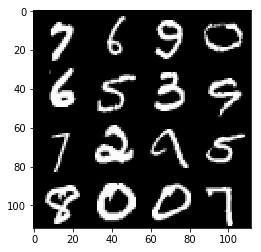

Reconstructed Images


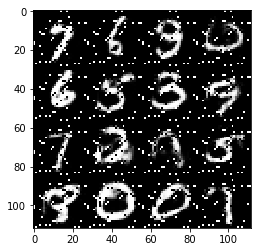

In [16]:
# 테스트 시작

n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))

for i in range(n):
    # MNIST test set
    test_X, _ = mnist.train.next_batch(batch_size)
    
    g = sess.run(decoder_op, feed_dict={X: test_X})

    # 원본 이미지를 가져와서 출력
    for j in range(n):
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = test_X[j].reshape([28, 28])
    # 재생성된 이미지를 가져와서 출력
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

# 테스트 결과 출력
print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()